# Fake Data Generation

In [201]:
import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
SEED = 0

In [202]:
from faker import Faker
Faker.seed(SEED)
fake = Faker()

import random
import numpy as np
import pandas as pd
np.random.seed(SEED)
random.seed(SEED)
restaurant_names = ["Bistro Bazaar","Bistro Captain","Bistroporium","Cuisine Street","Cuisine Wave","Deli Divine","Deli Feast","Eatery Hotspot","Eateryworks","Feast Lounge","Feast Palace","Grub Chef","Grub lord","Kitchen Sensation","Kitchen Takeout","Menu Feed","Menu Gusto","Munchies","Munch Grill","Munchtastic","Island Grill","Flavoroso","Green Curry","El Pirata Porch","Sweet Escape","Salty Squid","Bangalore Spices","Pancake World","Veganic Corner","Masala","Grassfed Grill","Greenanic Smoothies","Freddy’s Stove","Grandma’s Sweets","Spicella Spanish Kitchen","Xin Chao Vietnamese Restaurant","Paterro's Kitchen","Mediterra Seafood","Street Deli","Whispering Bamboo"]
restaurant_number_of_items = [random.randint(1, 40) for _ in range(len(restaurant_names))]

    
def random_there_was_a_purchase_generator(num_of_items_on_menu):
    if 1 <= num_of_items_on_menu <= 3:
        return np.random.choice([0, 1], 1, p=[0.95, 0.05])[0]
    
    if 4 <= num_of_items_on_menu <= 5:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 6 <= num_of_items_on_menu <= 8:
        return np.random.choice([0, 1], 1, p=[0.05, 0.95])[0]
    
    elif 9 <= num_of_items_on_menu <= 11:
        return np.random.choice([0, 1], 1, p=[0.05, 0.95])[0]
    
    elif 12 <= num_of_items_on_menu <= 14:
        return np.random.choice([0, 1], 1, p=[0.1, 0.9])[0]
    
    elif 15 <= num_of_items_on_menu <= 17:
        return np.random.choice([0, 1], 1, p=[0.1, 0.9])[0]
    
    elif 18 <= num_of_items_on_menu <= 20:
        return np.random.choice([0, 1], 1, p=[0.8, 0.2])[0]
    
    elif 21 <= num_of_items_on_menu <= 25:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 26 <= num_of_items_on_menu <= 30:
        return np.random.choice([0, 1], 1, p=[0.9, 0.1])[0]
    
    elif 31 <= num_of_items_on_menu <= 40:
        return np.random.choice([0, 1], 1, p=[0.95, 0.05])[0]
    
    else:
        return np.random.choice([0, 1], 1, p=[0.9995, 0.0005])[0]

In [203]:
def generate_fake_dataset():

    res_name = restaurant_names[random.randint(0, 39)]
    res_num_items = restaurant_number_of_items[restaurant_names.index(res_name)]
    is_purchase = random_there_was_a_purchase_generator(res_num_items)
    
    return {
        "UUID": "ID-{}".format(fake.credit_card_number()[1:10]),
        "Name": fake.name(),
        "Restaurant Visited": res_name,
        "Number of items on menu": res_num_items,
        "Purchase": is_purchase
    }
        

df = pd.DataFrame([generate_fake_dataset() for _ in range(1000)])

In [204]:
df

,UUID,Name,Restaurant Visited,Number of items on menu,Purchase
0,ID-504876475,Brandon Lloyd,Xin Chao Vietnamese Restaurant,31,0
1,ID-131411578,Susan Levy,Bistro Bazaar,25,0
2,ID-884080160,Frederick Harrell,Deli Divine,32,0
3,ID-328711587,Michelle Kelley,Salty Squid,22,0
4,ID-131989471,Clinton Underwood,Bistro Bazaar,25,0
...,...,...,...,...,...
995,ID-375563356,Kevin Barajas,Island Grill,39,0
996,ID-011732912,Kathleen Fowler,El Pirata Porch,7,1
997,ID-131062236,Jennifer Becker,Mediterra Seafood,34,0
998,ID-793828318,Thomas Ramirez,Bistro Captain,27,0


# Descriptive Analytics

# Predictive Analytics

In [221]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

y = pd.DataFrame(df["Purchase"])
x = pd.DataFrame(df[["Number of items on menu"]])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED, test_size = 0.5)

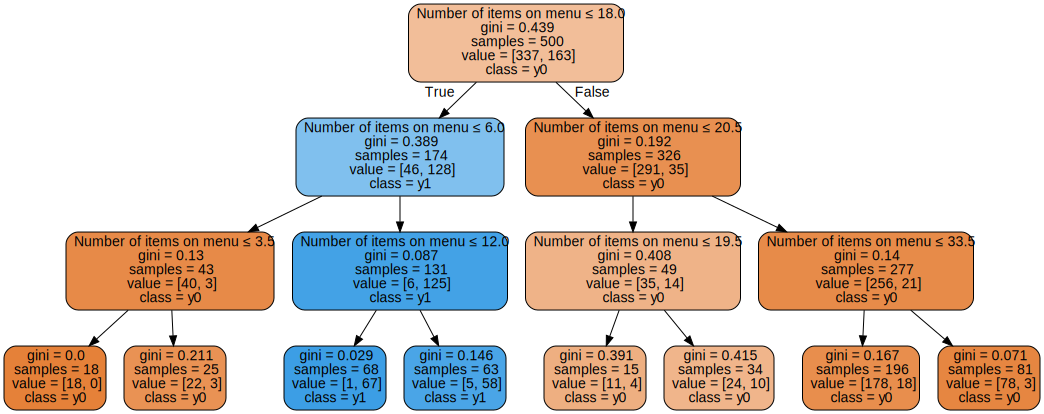

In [222]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
dectreex1 = DecisionTreeClassifier(max_depth = 3)
dectreex1.fit(x_train, y_train)

treedot = export_graphviz(dectreex1, feature_names = x_train.columns, class_names = True, out_file = None, filled = True, rounded = True, special_characters = True)      
graphviz.Source(treedot)

In [223]:
from sklearn.metrics import confusion_matrix

y_train_pred = dectreex1.predict(x_train)
y_test_pred = dectreex1.predict(x_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreex1.score(x_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.912

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.926



In [224]:
def was_there_a_purchase(value):
    if value == 1: return "will"
    else: return "will not"

NUMBER_OF_ITEMS_ON_MENU = 1
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer #1 {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 8
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer #2 {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

NUMBER_OF_ITEMS_ON_MENU = 30
salad_stop_prediction_arr = np.array([[NUMBER_OF_ITEMS_ON_MENU]])
salad_stop_prediction_df = pd.DataFrame(salad_stop_prediction_arr, columns = ['Number of items on menu'])
salad_stop_prediction = dectreex1.predict(salad_stop_prediction_df)
print("Particular customer #3 {} have made a purchase at a restautant with {} items!".format(was_there_a_purchase(salad_stop_prediction[0]), NUMBER_OF_ITEMS_ON_MENU))

Particular customer #1 will not have made a purchase at a restautant with 1 items!
Particular customer #2 will have made a purchase at a restautant with 8 items!
Particular customer #3 will not have made a purchase at a restautant with 30 items!
